<a href="https://colab.research.google.com/github/sumitsaxena-git/ai-bootcamp/blob/main/Home_Prices_Prediction_100_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques
! unzip /content/house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 65.7MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column].dtype):
      df[column] = LabelEncoder().fit_transform(df[column])

    else:
      if df[column].isnull().any():
        df[column].fillna(df[column].median(),inplace=True)

In [ ]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis="columns")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 140 to 42
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    int64  
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    int64  
 6   Alley          292 non-null    int64  
 7   LotShape       292 non-null    int64  
 8   LandContour    292 non-null    int64  
 9   Utilities      292 non-null    int64  
 10  LotConfig      292 non-null    int64  
 11  LandSlope      292 non-null    int64  
 12  Neighborhood   292 non-null    int64  
 13  Condition1     292 non-null    int64  
 14  Condition2     292 non-null    int64  
 15  BldgType       292 non-null    int64  
 16  HouseStyle     292 non-null    int64  
 17  OverallQual    292 non-null    int64  
 18  OverallCond   

In [ ]:
import numpy as np

def print_accuracy(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_name = model.__class__.__name__

  from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
  print("Accuracy for model: ", model_name)
  print("R Squared : ", r2_score(y_test, y_pred))
  print("Mean Absolute Error :", round(mean_absolute_error(y_test,y_pred)))
  print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
def run_popular_regression_models():
  from sklearn.ensemble import RandomForestRegressor
  model = RandomForestRegressor(n_estimators = 9, max_depth = 6, random_state = 0)
  print_accuracy(model)

  from sklearn.linear_model import ElasticNet
  model = ElasticNet()
  print_accuracy(model)

  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=7, random_state = 0,learning_rate=0.2)
  print_accuracy(model)

  from sklearn.ensemble import GradientBoostingRegressor
  model = GradientBoostingRegressor()
  print_accuracy(model)

  from sklearn.linear_model import BayesianRidge
  model = BayesianRidge()
  print_accuracy(model)

  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  print_accuracy(model)

  from sklearn.neural_network import MLPRegressor
  model = MLPRegressor(random_state=0,max_iter=1000)
  print_accuracy(model)

run_popular_regression_models()

Accuracy for model:  RandomForestRegressor
R Squared :  0.8389188542732602
Mean Absolute Error : 18202
RMSE: 28203
Accuracy for model:  ElasticNet
R Squared :  0.4895803752023943
Mean Absolute Error : 19695
RMSE: 50203


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+11, tolerance: 7.763e+08
  model = cd_fast.enet_coordinate_descent(


Accuracy for model:  XGBRegressor
R Squared :  0.8631562356500777
Mean Absolute Error : 16320
RMSE: 25994
Accuracy for model:  GradientBoostingRegressor
R Squared :  0.8771862788495619
Mean Absolute Error : 14788
RMSE: 24626
Accuracy for model:  BayesianRidge
R Squared :  0.5142740280339277
Mean Absolute Error : 19630
RMSE: 48974
Accuracy for model:  LinearRegression
R Squared :  0.5001475195435123
Mean Absolute Error : 21454
RMSE: 49681
Accuracy for model:  MLPRegressor
R Squared :  0.32394844600672823
Mean Absolute Error : 27290
RMSE: 57777


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

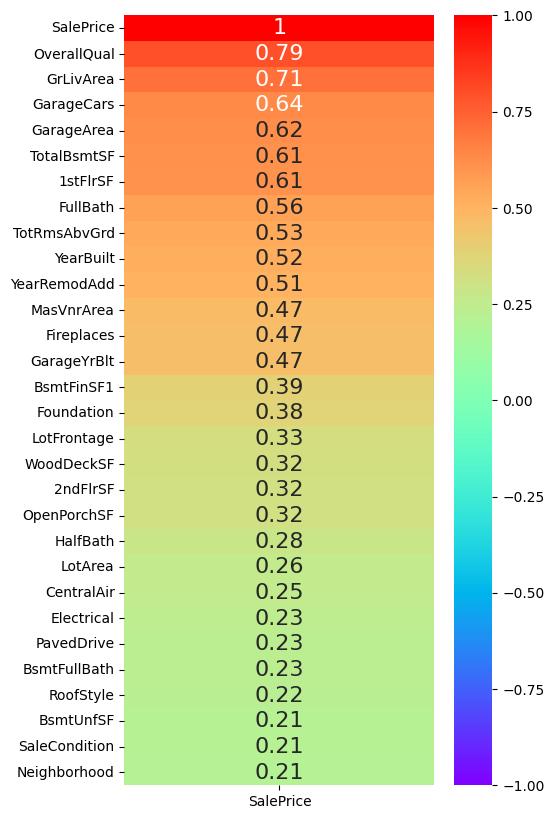

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

top_features = df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features, cmap='rainbow',annot=True,annot_kws={"size": 16}, vmin=-1)

In [ ]:
#Let's load the data again
df = pd.read_csv("train.csv")

In [ ]:
df['TotalSquareFeet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])

df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df['TotalPorchArea'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

df['SqFtPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + df['FullBath'] + df['HalfBath'] + df['KitchenAbvGr'])

df = pd.get_dummies(df,drop_first=True, dtype=int)

In [ ]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis="columns")

##
X = pd.get_dummies(df,drop_first=True, dtype=int)
for col in X.columns:
  if pd.api.types.is_numeric_dtype(X[col].dtype):
    if X[col].isnull().any():
      X[col].fillna(X[col].median(),inplace=True)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


<Axes: >

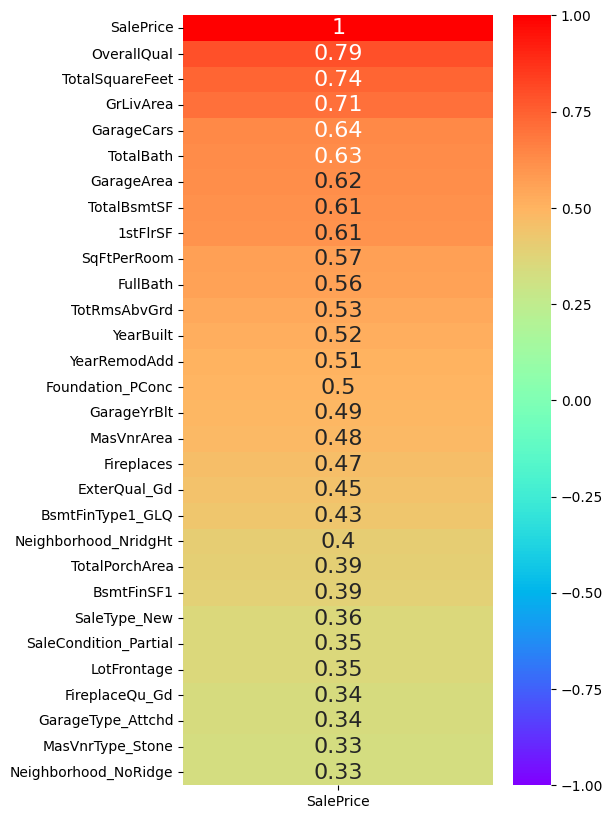

In [ ]:
top_features = df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features, cmap='rainbow',annot=True,annot_kws={"size": 16}, vmin=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
run_popular_regression_models()

Accuracy for model:  RandomForestRegressor
R Squared :  0.9996818653121553
Mean Absolute Error : 759
RMSE: 1253
Accuracy for model:  ElasticNet
R Squared :  0.9999999998549429
Mean Absolute Error : 1
RMSE: 1
Accuracy for model:  XGBRegressor
R Squared :  0.9935542138468659
Mean Absolute Error : 949
RMSE: 5642
Accuracy for model:  GradientBoostingRegressor
R Squared :  0.9998400325100715
Mean Absolute Error : 630
RMSE: 889
Accuracy for model:  BayesianRidge
R Squared :  -56123547116147.445
Mean Absolute Error : 66138657815
RMSE: 526427157940
Accuracy for model:  LinearRegression
R Squared :  1.0
Mean Absolute Error : 0
RMSE: 0
Accuracy for model:  MLPRegressor
R Squared :  0.9999937039708456
Mean Absolute Error : 135
RMSE: 176


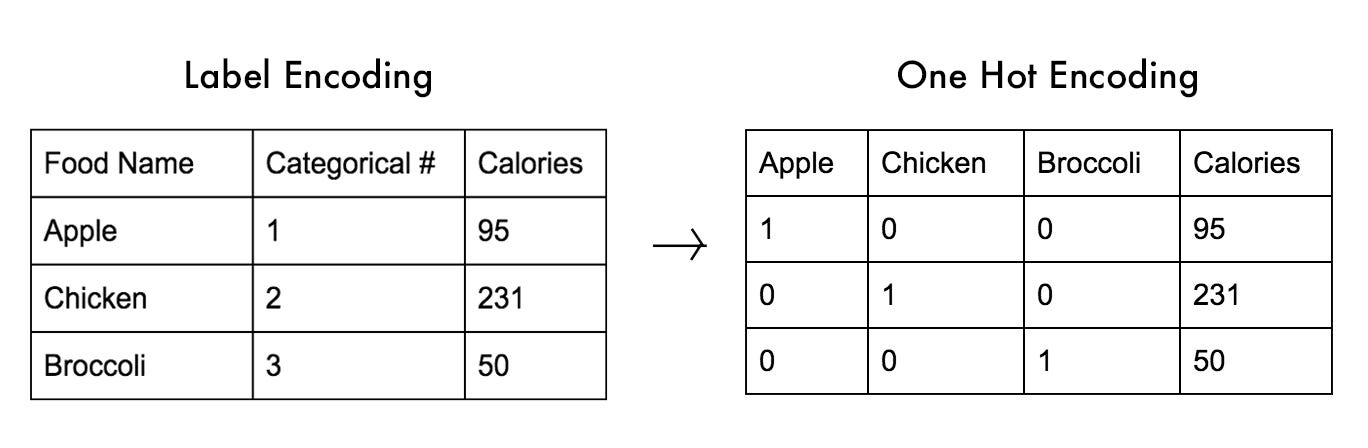